In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import itertools
import urllib
import csv

import sklearn
from sklearn import svm, datasets
from sklearn.naive_bayes import BernoulliNB, GaussianNB, MultinomialNB
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize

from sklearn import metrics
from sklearn.metrics import accuracy_score

from itertools import cycle
from scipy import interp

In [90]:
X_train = np.loadtxt(open("train/out_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("train/out_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("test/out_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("test/out_classes_0.txt", "rb"), delimiter=",", skiprows=0)

In [91]:
# confusion matrices
# code initially taken from: http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html

class_names = ['positive (1)', 'negative (0)'];

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix')
        #print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [92]:
def make_confusion_matrix(y_test, y_pred, title_):

    # Compute confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=class_names,
                          title=title_)

#     # Plot normalized confusion matrix
#     plt.figure()
#     plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
#                           title='Normalized confusion matrix')

    plt.show()

In [93]:
# initial code take from: https://datamize.wordpress.com/2015/01/24/how-to-plot-a-roc-curve-in-scikit-learn/
def make_roc_curve(y_test, y_pred):
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
    roc_auc = auc(false_positive_rate, true_positive_rate)

    plt.title('Receiver Operating Characteristic (ROC)')
    plt.plot(false_positive_rate, true_positive_rate, 'b',
    label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

In [94]:
# BernNB = BernoulliNB()
# BernNB.fit(X_train, y_train)
# #print(BernNB)

# y_expect = y_test
# y_pred = BernNB.predict(X_test)
# print(accuracy_score(y_expect,y_pred))

# make_confusion_matrix(y_test, y_pred)
# make_roc_curve(y_test, y_pred)

MultiNB = MultinomialNB()
MultiNB.fit(X_train, y_train)
print(MultiNB)

y_expect = y_test
y_pred = MultiNB.predict(X_test)
print(accuracy_score(y_expect, y_pred))

make_confusion_matrix(y_test, y_pred)
make_roc_curve(y_test, y_pred

In [95]:
# GausNB = GaussianNB()
# GausNB.fit(X_train, y_train)
# print(GausNB)

# y_expect = y_test
# y_pred = GausNB.predict(X_test)
# print(accuracy_score(y_expect,y_pred))

# make_confusion_matrix(y_test, y_pred)
# make_roc_curve(y_test, y_pred)

In [96]:
# BernNB = BernoulliNB(binarize = 0.1)
# BernNB.fit(X_train, y_train)
# print(BernNB)

# y_expect = y_test
# y_pred = BernNB.predict(X_test)
# print(accuracy_score(y_expect, y_pred))

# make_confusion_matrix(y_test, y_pred)
# make_roc_curve(y_test, y_pred)

In [97]:
X_train = np.loadtxt(open("bow_variations/1_simple/var1_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("bow_variations/1_simple/var1_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("bow_variations/1_simple/test1_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("bow_variations/1_simple/test1_classes_0.txt", "rb"), delimiter=",", skiprows=0)

0.648333333333
Confusion Matrix
[[132 168]
 [ 43 257]]


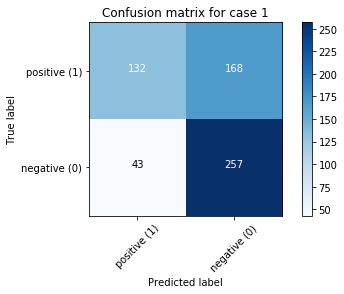

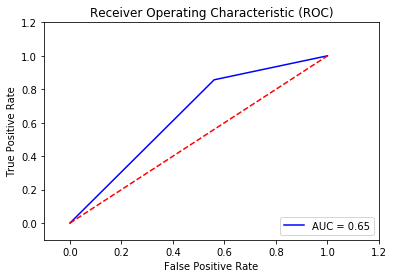

In [98]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred, "Confusion matrix for case 1")
make_roc_curve(y_test, y_pred)

In [99]:
X_train = np.loadtxt(open("bow_variations/2_lowercase/var2_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("bow_variations/2_lowercase/var2_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("bow_variations/2_lowercase/test2_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("bow_variations/2_lowercase/test2_classes_0.txt", "rb"), delimiter=",", skiprows=0)

0.646666666667
Confusion Matrix
[[129 171]
 [ 41 259]]


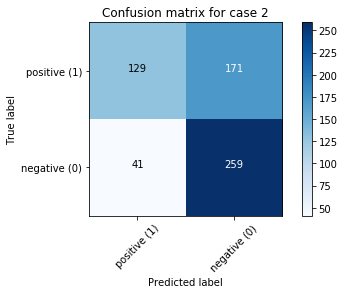

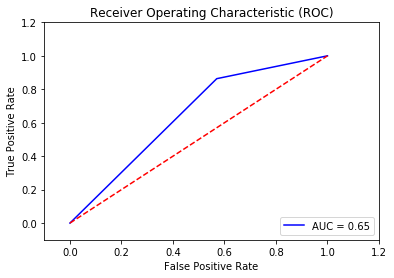

In [100]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred, "Confusion matrix for case 2")
make_roc_curve(y_test, y_pred)

In [101]:
X_train = np.loadtxt(open("bow_variations/3_only_exclamation_and_question marks_lowerc/var3_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("bow_variations/3_only_exclamation_and_question marks_lowerc/var3_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("bow_variations/3_only_exclamation_and_question marks_lowerc/test3_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("bow_variations/3_only_exclamation_and_question marks_lowerc/test3_classes_0.txt", "rb"), delimiter=",", skiprows=0)

0.686666666667
Confusion Matrix
[[168 132]
 [ 56 244]]


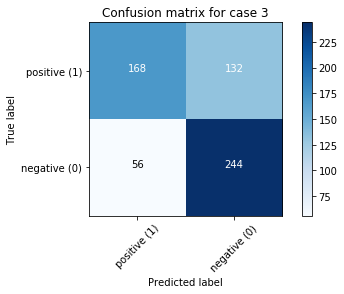

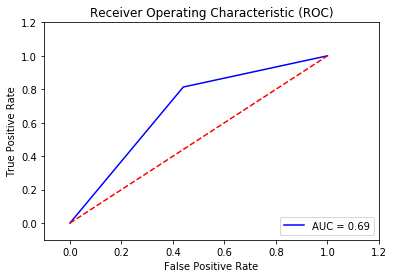

In [102]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred, "Confusion matrix for case 3")
make_roc_curve(y_test, y_pred)

In [103]:
X_train = np.loadtxt(open("bow_variations/4_no_punc_lowerc/var4_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("bow_variations/4_no_punc_lowerc/var4_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("bow_variations/4_no_punc_lowerc/test4_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("bow_variations/4_no_punc_lowerc/test4_classes_0.txt", "rb"), delimiter=",", skiprows=0)

0.678333333333
Confusion Matrix
[[162 138]
 [ 55 245]]


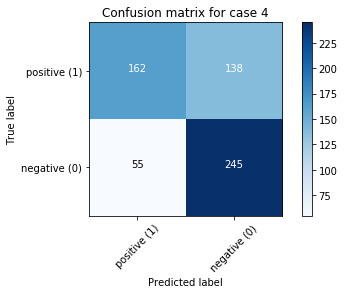

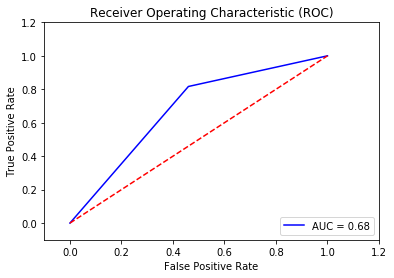

In [104]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred, "Confusion matrix for case 4")
make_roc_curve(y_test, y_pred)

In [105]:
X_train = np.loadtxt(open("bow_variations/5_stopwords_nopunc_lowerc/var5_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("bow_variations/5_stopwords_nopunc_lowerc/var5_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("bow_variations/5_stopwords_nopunc_lowerc/test5_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("bow_variations/5_stopwords_nopunc_lowerc/test5_classes_0.txt", "rb"), delimiter=",", skiprows=0)

0.69
Confusion Matrix
[[239  61]
 [125 175]]


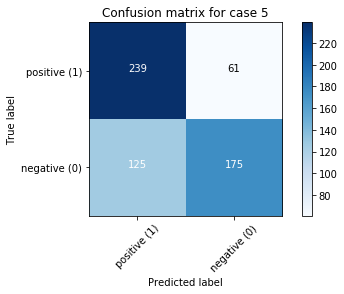

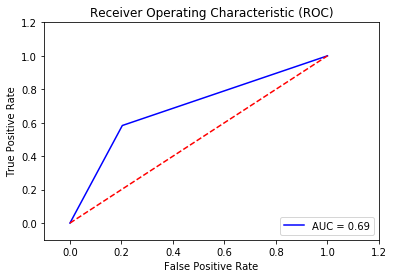

In [106]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred, "Confusion matrix for case 5")
make_roc_curve(y_test, y_pred)

In [107]:
X_train = np.loadtxt(open("bow_variations/6_stemlem_stopwords_nopunc_lowerc/var6_bag_of_words_5.csv", "rb"), delimiter=",", skiprows=0)
y_train = np.loadtxt(open("bow_variations/6_stemlem_stopwords_nopunc_lowerc/var6_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test  = np.loadtxt(open("bow_variations/6_stemlem_stopwords_nopunc_lowerc/test6_bag_of_words_0.csv", "rb"), delimiter=",", skiprows=0)
y_test  = np.loadtxt(open("bow_variations/6_stemlem_stopwords_nopunc_lowerc/test6_classes_0.txt", "rb"), delimiter=",", skiprows=0)

0.773333333333
Confusion Matrix
[[239  61]
 [ 75 225]]


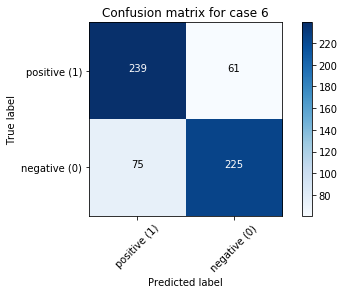

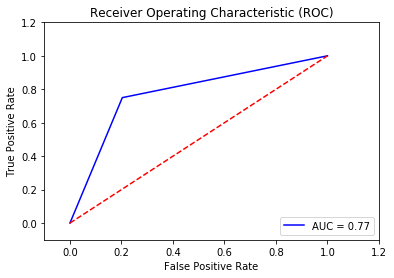

In [108]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred, "Confusion matrix for case 6")
make_roc_curve(y_test, y_pred)

In [113]:
# loading the npz file to run classifiers:
X_train = np.load("bow_variations/7_spellcheck_stopw_stemlem_nopunc_lowerc/var7_tfidf_5.npz")
y_train = np.loadtxt(open("bow_variations/7_spellcheck_stopw_stemlem_nopunc_lowerc/var7_classes_5.txt", "rb"), delimiter=",", skiprows=0)

X_test = np.load("bow_variations/7_spellcheck_stopw_stemlem_nopunc_lowerc/test7_tfidf_0.npz")
y_test = np.loadtxt(open("bow_variations/7_spellcheck_stopw_stemlem_nopunc_lowerc/var7_classes_5.txt", "rb"), delimiter=",", skiprows=0)

In [ ]:
BernNB = BernoulliNB()
BernNB.fit(X_train, y_train)

y_expect = y_test
y_pred = BernNB.predict(X_test)
print(accuracy_score(y_expect,y_pred))

make_confusion_matrix(y_test, y_pred, "Confusion matrix for case 8")
make_roc_curve(y_test, y_pred)